# 3️⃣ User / Client-Level

👉 이 사람은 어떤 사람인가?


**프로파일 축**

yearly_income

credit_score

total_debt

credit_limit

num_credit_cards

months_from_account

years_since_pin_change

current_age

male


num_card_issued

In [9]:
df["num_cards_issued"].value_counts()

num_cards_issued
2    2684257
1    2585556
3      42898
Name: count, dtype: int64

In [25]:
p = (
    df.groupby(["fraud", "num_cards_issued"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
      .unstack(fill_value=0)
)

p

,num_cards_issued,1,2,3
fraud,fraud,,,
0,0,0.486670,0.50526,0.008070
1,1,0.488814,0.49974,0.011446


/home/nakyung/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


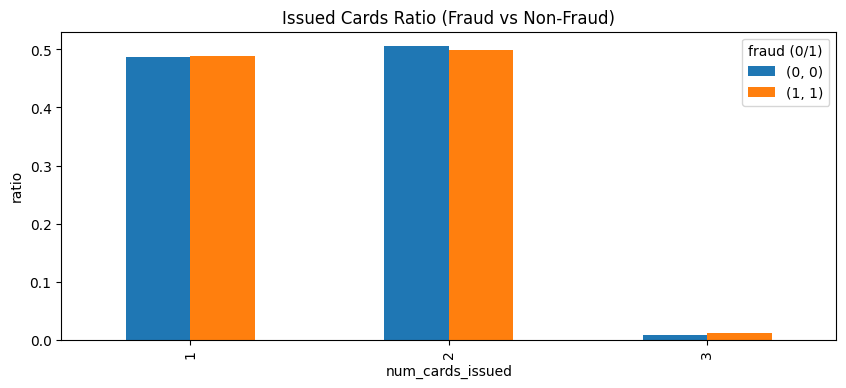

In [26]:
p = p.T
ax = p.sort_index().plot(kind="bar", figsize=(10,4))
ax.set_xlabel("num_cards_issued")
ax.set_ylabel("ratio")
ax.set_title("Issued Cards Ratio (Fraud vs Non-Fraud)")
ax.legend(title="fraud (0/1)")

num_credit_cards

In [22]:
p = (
    df.groupby(["fraud", "num_credit_cards"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
      .unstack(fill_value=0)
)

p

,num_credit_cards,1,2,3,4,5,6,7,8,9
fraud,fraud,,,,,,,,,
0,0,0.066878,0.126280,0.227335,0.266365,0.169337,0.090122,0.036630,0.015493,0.001561
1,1,0.039282,0.118106,0.207596,0.257024,0.189906,0.106790,0.046176,0.029787,0.005333


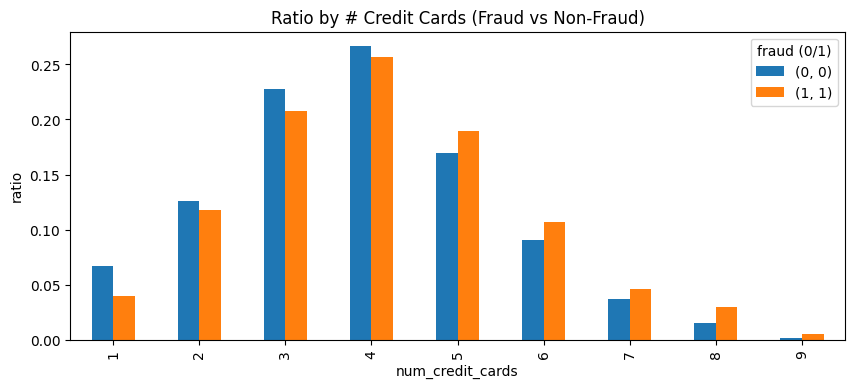

In [24]:
p = p.T
ax = p.sort_index().plot(kind="bar", figsize=(10,4))
ax.set_xlabel("num_credit_cards")
ax.set_ylabel("ratio")
ax.set_title("Ratio by # Credit Cards (Fraud vs Non-Fraud)")
ax.legend(title="fraud (0/1)")

In [28]:
df.groupby("num_credit_cards")["fraud"].agg(
    ["count", "mean"]
)

,count,mean
num_credit_cards,,
1,355089,0.000850
2,670827,0.001354
3,1207615,0.001322
4,1415048,0.001396
5,899795,0.001623
6,478920,0.001714
7,194676,0.001824
8,82419,0.002778
9,8322,0.004927


In [29]:
client = (
    df.groupby("client_id")
      .agg(
          num_cards=("num_credit_cards","max"),
          num_tx=("fraud","count"),
          fraud_rate=("fraud","mean")
      )
)
client.groupby("num_cards")["fraud_rate"].mean()


num_cards
1    0.001104
2    0.001589
3    0.002346
4    0.001714
5    0.001973
6    0.001892
7    0.002197
8    0.002906
9    0.004237
Name: fraud_rate, dtype: float64

In [30]:
X = client[["num_cards", "num_tx"]]
X = sm.add_constant(X)
y = (client["fraud_rate"] > 0).astype(int)

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.625521
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             fraud_rate   No. Observations:                 1209
Model:                          Logit   Df Residuals:                     1206
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Feb 2026   Pseudo R-squ.:                 0.02247
Time:                        11:13:28   Log-Likelihood:                -756.25
converged:                       True   LL-Null:                       -773.64
Covariance Type:            nonrobust   LLR p-value:                 2.822e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3346      0.187     -1.792      0.073      -0.701       0.031
num_cards      0.2090      0.

> High-card holders 그룹에서 fraud 비중이 상대적으로 더 높아진다

In [54]:
results = []

for col in ["yearly_income",
            "credit_score",
            "total_debt",
            "credit_limit",
            "num_credit_cards"]:

    X = sm.add_constant(df[[col]].dropna())
    y = df.loc[X.index, "fraud"]

    model = sm.Logit(y, X).fit(disp=0)

    coef = model.params[col]
    pval = model.pvalues[col]
    or_val = np.exp(coef)

    results.append([col, coef, or_val, pval])

pd.DataFrame(results, columns=["feature","coef","OR","p_value"])


,feature,coef,OR,p_value
0,yearly_income,-0.000005,0.999995,7.885687e-20
1,credit_score,0.000009,1.000009,9.588085e-01
2,total_debt,-0.000002,0.999998,2.161809e-20
3,credit_limit,-0.000015,0.999985,1.079906e-42
4,num_credit_cards,0.110118,1.116410,3.760647e-54


months_from_account

In [35]:
df["months_from_account"].describe()

count    5.312525e+06
mean     6.807525e+01
std      4.576855e+01
min      0.000000e+00
25%      3.300000e+01
50%      6.100000e+01
75%      9.600000e+01
max      2.990000e+02
Name: months_from_account, dtype: float64

In [36]:
p = df[df["months_from_account"]<0]
len(p)

0

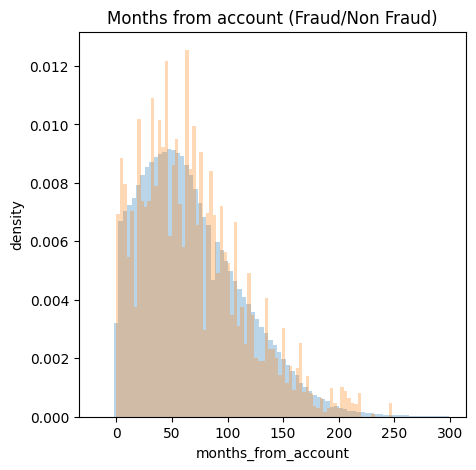

In [40]:
plt.figure(figsize=(5,5))
plt.hist(non["months_from_account"], bins=80, density=True, alpha=0.3, label="Non-Fraud")
plt.hist(fraud["months_from_account"], bins=80, density=True, alpha=0.3, label="Fraud")
plt.xlabel("months_from_account")
plt.title("Months from account (Fraud/Non Fraud)")
plt.ylabel("density")
plt.show()

years_since_pin_change

In [41]:
df["years_since_pin_change"].describe()

count    5.312525e+06
mean     2.120739e+00
std      2.216062e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.300000e+01
Name: years_since_pin_change, dtype: float64

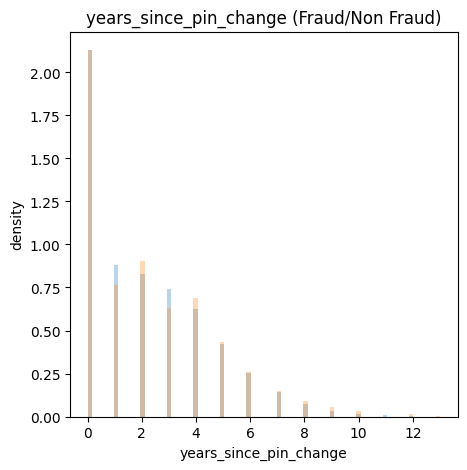

In [42]:
plt.figure(figsize=(5,5))
plt.hist(non["years_since_pin_change"], bins=80, density=True, alpha=0.3, label="Non-Fraud")
plt.hist(fraud["years_since_pin_change"], bins=80, density=True, alpha=0.3, label="Fraud")
plt.xlabel("years_since_pin_change")
plt.title("years_since_pin_change (Fraud/Non Fraud)")
plt.ylabel("density")
plt.show()

male

In [48]:
df.groupby("fraud")["male"].mean()

fraud
0    0.489206
1    0.482830
Name: male, dtype: float64

In [ ]:
results = []

for col in ["months_from_account",
            "years_since_pin_change",
            "current_age",
            "male",
            "num_credit_cards"]:

    X = sm.add_constant(df[[col]].dropna())
    y = df.loc[X.index, "fraud"]

    model = sm.Logit(y, X).fit(disp=0)

    coef = model.params[col]
    pval = model.pvalues[col]
    or_val = np.exp(coef)

    results.append([col, coef, or_val, pval])

pd.DataFrame(results, columns=["feature","coef","OR","p_value"])


,feature,coef,OR,p_value
0,months_from_account,0.000289,1.000289,2.439538e-01
1,years_since_pin_change,0.023212,1.023483,3.788355e-06
2,current_age,0.006636,1.006658,1.018238e-20
3,male,-0.025523,0.974800,2.637827e-01
4,num_credit_cards,0.110118,1.116410,3.760647e-54


In [53]:
df.drop(columns=["male", "months_from_account"], inplace=True)

---

# 4️⃣ History

### Merchant ID _ fraud 

In [ ]:
df = df.sort_values("date")

df["merchant_cum_fraud"] = (
    df.groupby("merchant_id")["fraud"]
      .cumsum()
      .shift(1)
      .fillna(0)
)

In [107]:
df["merchant_cum_tx"] = (
    df.groupby("merchant_id").cumcount()
)

df["merchant_fraud_rate"] = (
    df["merchant_cum_fraud"] /
    (df["merchant_cum_tx"] + 1)
)


In [111]:
results = []

for col in ["merchant_fraud_rate", "merchant_cum_fraud"]:

    X = sm.add_constant(df[[col]].dropna())
    y = df.loc[X.index, "fraud"]

    model = sm.Logit(y, X).fit(disp=0)

    coef = model.params[col]
    pval = model.pvalues[col]
    or_val = np.exp(coef)

    results.append([col, coef, or_val, pval])

pd.DataFrame(results, columns=["feature","coef","OR","p_value"])

,feature,coef,OR,p_value
0,merchant_fraud_rate,0.007414,1.007442,1.698145e-33
1,merchant_cum_fraud,0.000052,1.000052,7.772519e-01


In [ ]:
X = sm.add_constant(df[["merchant_fraud_rate", "merchant_cum_fraud"]].dropna())
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.010901
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              5312525
Model:                          Logit   Df Residuals:                  5312522
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Feb 2026   Pseudo R-squ.:               0.0006353
Time:                        15:10:06   Log-Likelihood:                -57911.
converged:                       True   LL-Null:                       -57948.
Covariance Type:            nonrobust   LLR p-value:                 1.025e-16
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.5366      0.012   -548.296      0.000      -6.560      -6.513
m

> 통계적으로는 유의미하지만
> 효과 크기는 거의 없음.

In [113]:
df.groupby("merchant_id")["fraud"].sum().describe()

count    53596.000000
mean         0.143444
std          4.249446
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        571.000000
Name: fraud, dtype: float64

### Amount 기반 이탈도

In [41]:
df["client_avg_amount_prev"] = (
    df.groupby("client_id")["amount"]
      .expanding()
      .mean()
      .shift(1)
      .reset_index(level=0, drop=True)
)

In [ ]:
df["amount_vs_client_avg_ratio"] = (
    df["amount"] / df["client_avg_amount_prev"]
)

In [43]:
df["amount_vs_client_avg_diff"] = (
    df["amount"] - df["client_avg_amount_prev"]
)

### MCC 기반 행동 이탈

In [ ]:
df[df["client_mcc_is_new"]==1]["mcc"].value_counts().head(10)

mcc
5311    1208
5300    1207
5541    1207
5310    1206
5411    1206
5912    1206
5211    1203
5499    1200
7230    1200
5942    1200
Name: count, dtype: int64

In [63]:
df.groupby("mcc")["fraud"].mean().sort_values(ascending=False).head(10)

/tmp/ipykernel_3743864/79550822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("mcc")["fraud"].mean().sort_values(ascending=False).head(10)


mcc
4411    0.658163
5733    0.395522
3006    0.140000
5732    0.107561
3144    0.090164
3005    0.085890
5045    0.083486
3009    0.076389
3007    0.069182
5816    0.066492
Name: fraud, dtype: float64

신규 MCC 효과 = 단순히 “원래 위험한 업종이라서”는 아님.

In [66]:
df["amount"].max()

np.float32(5696.78)

In [64]:
df[df["client_mcc_is_new"]==1]["amount"].describe()

count    80128.000000
mean       177.812225
std        274.712952
min       -500.000000
25%         27.200001
50%         88.105000
75%        239.622501
max       5696.779785
Name: amount, dtype: float64

In [65]:
df[df["client_mcc_is_new"]==1]["card_error_last1"].mean()

np.float64(0.012654752396166135)

신규 MCC 신호는 error와 완전히 종속된 건 아니다.

### 시간대, frequency 기반 이탈

In [5]:
df["hour_deviation"] = np.sqrt(
    (df["hour_sin"] - df["client_hour_sin_avg"])**2 +
    (df["hour_cos"] - df["client_hour_cos_avg"])**2
)

In [6]:
df["hour_deviation"].describe()

count    5.312524e+06
mean     8.089620e-01
std      3.073395e-01
min      0.000000e+00
25%      5.729767e-01
50%      7.869112e-01
75%      1.016422e+00
max      2.000000e+00
Name: hour_deviation, dtype: float64

In [8]:
g = df.groupby("client_id")["weekday"]

df["client_weekday_prev"] = g.shift(1)
df["client_weekday_match_last1"] = (
    df["weekday"] == df["client_weekday_prev"]
).astype("int8")

In [9]:
w1 = (df["weekday"] == g.shift(1))
w2 = (df["weekday"] == g.shift(2))
w3 = (df["weekday"] == g.shift(3))
w4 = (df["weekday"] == g.shift(4))
w5 = (df["weekday"] == g.shift(5))

df["client_weekday_seen_last5"] = (
    (w1 | w2 | w3 | w4 | w5)
    .fillna(False)
    .astype("int8")
)

In [10]:
df["client_weekday_prior_count"] = (
    df.groupby(["client_id", "weekday"])
      .cumcount()
)

df["client_weekday_is_new"] = (
    df["client_weekday_prior_count"] == 0
).astype("int8")

In [11]:
df = df.sort_values(["client_id", "date"])

df["prev_tx_time"] = (
    df.groupby("client_id")["date"]
      .shift(1)
)

df["seconds_since_prev_tx"] = (
    (df["date"] - df["prev_tx_time"])
      .dt.total_seconds()
)

In [12]:
g = df.groupby("client_id")["seconds_since_prev_tx"]

df["client_avg_interval_prev"] = (
    g.expanding()
     .mean()
     .shift(1)
     .reset_index(level=0, drop=True)
)

In [13]:
df["interval_ratio"] = (
    df["seconds_since_prev_tx"] /
    df["client_avg_interval_prev"]
)
df["log_interval_dev"] = np.log1p(df["seconds_since_prev_tx"]) - \
                         np.log1p(df["client_avg_interval_prev"])

In [15]:
df.isnull().sum()

date                             0
client_id                        0
card_id                          0
amount                           0
merchant_id                      0
mcc                              0
fraud                            0
has_error                        0
err_bad_card_number              0
err_bad_expiration               0
err_bad_cvv                      0
err_bad_pin                      0
err_bad_zipcode                  0
err_insufficient_balance         0
err_technical_glitch             0
tx_year                          0
tx_month                         0
tx_day                           0
tx_hour                          0
weekday                          0
is_refund                        0
log_abs_amount                   0
current_age                      0
per_capita_income                0
yearly_income                    0
total_debt                       0
credit_score                     0
num_credit_cards                 0
has_chip            

In [16]:
df["is_first_tx_client"] = (
    df.groupby("client_id").cumcount() == 0
).astype("int8")

In [ ]:
fill_zero_cols = [
    "client_hour_sin_avg",
    "client_hour_cos_avg",
    "hour_deviation",
    "seconds_since_prev_tx",
    "client_avg_interval_prev",
    "interval_ratio",
    "log_interval_dev",
]

df[fill_zero_cols] = df[fill_zero_cols].fillna(0)


In [19]:
df["client_weekday_prev"] = df["client_weekday_prev"].fillna(-1)
df = df.drop(columns=["prev_tx_time"])

In [20]:
df.isnull().sum()

date                          0
client_id                     0
card_id                       0
amount                        0
merchant_id                   0
mcc                           0
fraud                         0
has_error                     0
err_bad_card_number           0
err_bad_expiration            0
err_bad_cvv                   0
err_bad_pin                   0
err_bad_zipcode               0
err_insufficient_balance      0
err_technical_glitch          0
tx_year                       0
tx_month                      0
tx_day                        0
tx_hour                       0
weekday                       0
is_refund                     0
log_abs_amount                0
current_age                   0
per_capita_income             0
yearly_income                 0
total_debt                    0
credit_score                  0
num_credit_cards              0
has_chip                      0
num_cards_issued              0
credit_limit                  0
year_pin

In [23]:
check_cols = [
    "hour_deviation",
    "client_weekday_prev",
    "client_weekday_match_last1",
    "client_weekday_seen_last5",
    "client_weekday_prior_count",
    "seconds_since_prev_tx",
    "client_avg_interval_prev",
    "client_weekday_is_new",
    "interval_ratio",
    "log_interval_dev",
]

np.isinf(df[check_cols]).sum().sort_values(ascending=False)

interval_ratio                4
hour_deviation                0
client_weekday_prev           0
client_weekday_match_last1    0
client_weekday_prior_count    0
client_weekday_seen_last5     0
seconds_since_prev_tx         0
client_avg_interval_prev      0
client_weekday_is_new         0
log_interval_dev              0
dtype: int64

In [24]:
df["interval_ratio"] = df["interval_ratio"].replace([np.inf, -np.inf], 0)

In [25]:
results = []

for col in ["hour_deviation",
            "client_weekday_prev",
            "client_weekday_match_last1",
            "client_weekday_seen_last5",
            "client_weekday_prior_count",
            "seconds_since_prev_tx",
            "client_avg_interval_prev", 
            "client_weekday_is_new",
            "interval_ratio",
            "log_interval_dev"]:

    X = sm.add_constant(df[[col]].dropna())
    y = df.loc[X.index, "fraud"]

    model = sm.Logit(y, X).fit(disp=0)

    coef = model.params[col]
    pval = model.pvalues[col]
    or_val = np.exp(coef)

    results.append([col, coef, or_val, pval])

pd.DataFrame(results, columns=["feature","coef","OR","p_value"])


/home/nakyung/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/nakyung/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


,feature,coef,OR,p_value
0,hour_deviation,4.732612e-01,1.605221,5.306015e-39
1,client_weekday_prev,7.910746e-02,1.082321,2.878849e-43
2,client_weekday_match_last1,7.210401e-01,2.056571,9.765014e-161
3,client_weekday_seen_last5,7.032989e-01,2.020407,1.848181e-149
4,client_weekday_prior_count,-7.142603e-04,0.999286,4.793634e-68
5,seconds_since_prev_tx,-1.184428e-05,0.999988,1.276062e-209
6,client_avg_interval_prev,9.707272e-07,1.000001,9.129876e-17
7,client_weekday_is_new,-5.597441e-01,0.571355,1.389651e-01
8,interval_ratio,-7.308872e-01,0.481482,0.000000e+00
9,log_interval_dev,-2.220581e-01,0.800869,0.000000e+00


In [77]:
X = sm.add_constant(df[["hour_deviation",
            "client_weekday_prev",
            "client_weekday_match_last1",
            "client_weekday_seen_last5",
            "client_weekday_prior_count",
            "seconds_since_prev_tx",
            "client_avg_interval_prev", 
            "client_weekday_is_new",
            "interval_ratio",
            "log_interval_dev"]].astype("float64"))

y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())

KeyError: "None of [Index(['hour_deviation', 'client_weekday_prev', 'client_weekday_match_last1',\n       'client_weekday_seen_last5', 'client_weekday_prior_count',\n       'seconds_since_prev_tx', 'client_avg_interval_prev',\n       'client_weekday_is_new', 'interval_ratio', 'log_interval_dev'],\n      dtype='object')] are in the [columns]"

| Feature           | 해석     |
| ----------------- | ------ |
| hour_deviation    | 시간대 이탈 |
| interval_ratio    | burst  |
| client_mcc_is_new | 신규 업종  |
| change_cnt        | 행동 불안정 |

In [26]:
df.drop(columns=["client_weekday_prev", 
"client_weekday_prior_count",
"client_weekday_is_new",
"seconds_since_prev_tx",
"client_avg_interval_prev",
"interval_ratio",
"client_weekday_seen_last5"], inplace=True)

In [ ]:
df = df.sort_values(["client_id", "date"])

df["client_tx_1h"] = (
    df.groupby("client_id")
      .rolling("1H", on="date")["fraud"]
      .count()
      .reset_index(level=0, drop=True)
)


/tmp/ipykernel_4093275/1237025632.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.groupby("client_id")
/tmp/ipykernel_4093275/1237025632.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.groupby("client_id")


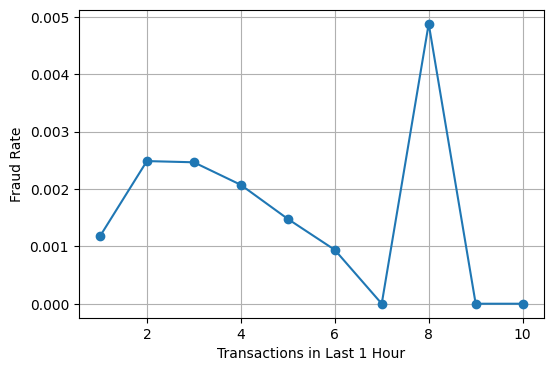

In [118]:
rate = (
    df.groupby("client_tx_1h")["fraud"]
      .mean()
)

plt.figure(figsize=(6,4))
rate.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.xlabel("Transactions in Last 1 Hour")
plt.grid(True)
plt.show()

In [ ]:
# 1시간에 몇 건

df["tx_1h_bin"] = pd.cut(
    df["client_tx_1h"],
    bins=[0,1,2,3,5,10,50],
    right=False
)

pivot = df.pivot_table(
    index="tx_1h_bin",
    columns="has_error",
    values="fraud",
    aggfunc="mean"
)

pivot

/tmp/ipykernel_4093275/1208708879.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


has_error,0,1
tx_1h_bin,,
"[1, 2)",0.001135,0.004639
"[2, 3)",0.002456,0.003329
"[3, 5)",0.002368,0.003173
"[5, 10)",0.001249,0.002299
"[10, 50)",0.000000,0.000000


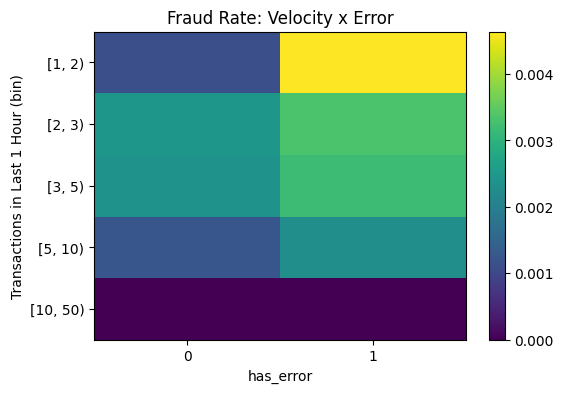

In [120]:
plt.figure(figsize=(6,4))
plt.imshow(pivot.values, aspect="auto")
plt.colorbar()
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index.astype(str))
plt.xlabel("has_error")
plt.ylabel("Transactions in Last 1 Hour (bin)")
plt.title("Fraud Rate: Velocity x Error")
plt.show()

In [122]:
cnt = df.pivot_table(index="tx_1h_bin", columns="has_error", values="fraud", aggfunc="size")
display(cnt)

/tmp/ipykernel_4093275/3253943802.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cnt = df.pivot_table(index="tx_1h_bin", columns="has_error", values="fraud", aggfunc="size")


has_error,0,1
tx_1h_bin,,
"[0, 1)",0,0
"[1, 2)",4123532,45916
"[2, 3)",844395,28838
"[3, 5)",242416,8510
"[5, 10)",17608,1305
"[10, 50)",4,1


| tx_1h_bin | error=0  | error=1  |
| --------- | -------- | -------- |
| [1,2)     | 0.001135 | 0.004639 |
| [2,3)     | 0.002456 | 0.003329 |
| [3,5)     | 0.002368 | 0.003173 |
| [5,10)    | 0.001249 | 0.002299 |


> 최근 1시간 내 거래가 2~4건 발생한 구간에서 fraud rate가 가장 높게 관찰\
> 소규모 burst 패턴이 사기 세션의 특징\
> 모든 거래량 구간에서 error 발생 시 fraud rate가 추가적으로 증가\

비정상 시도 + 소규모 연속 거래

mcc_is_new × has_error × velocity

In [ ]:
df["spike_bin_simple"] = pd.cut(
    df["velocity_spike_ratio"],
    bins=[0,1,2,5,20],
    right=False
)
pivot = df.pivot_table(
    index="spike_bin_simple",
    columns=["client_mcc_is_new","has_error"],
    values="fraud",
    aggfunc="mean"
)

display(pivot.round(5))


/tmp/ipykernel_4093275/810311928.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


client_mcc_is_new        0                 1         
has_error                0        1        0        1
spike_bin_simple                                     
[0, 1)             0.00104  0.00323  0.02155  0.06783
[1, 2)             0.00186  0.00250  0.07716  0.06579
[2, 5)             0.00190  0.00253  0.16667  0.50000

In [130]:
cnt = df.pivot_table(
    index="spike_bin_simple",
    columns=["client_mcc_is_new","has_error"],
    values="fraud",
    aggfunc="size"
)

display(cnt)

/tmp/ipykernel_4093275/3199240940.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cnt = df.pivot_table(


has_error,0,1,0,1
spike_bin_simple,,,,
"[0, 1)",4898491,73887,77367,1032
"[1, 2)",242013,8783,1633,76
"[2, 5)",8433,790,18,2
"[5, 20)",0,0,0,0


> 표본 부족

velocity_spike_ratio =
client_tx_1h / client_avg_tx_1h_prev

In [ ]:
df = df.sort_values(["client_id", "date"]).reset_index(drop=True)


df["client_tx_1h_avg_prev"] = (
    df.groupby("client_id")["client_tx_1h"]
      .expanding()
      .mean()
      .shift(1)
      .reset_index(level=0, drop=True)
)

df["client_tx_1h_avg_prev"] = df["client_tx_1h_avg_prev"].fillna(0)


In [124]:
df["velocity_spike_ratio"] = (
    df["client_tx_1h"] /
    (df["client_tx_1h_avg_prev"] + 1)   # 안정성 위해 +1
)


In [125]:
df["velocity_spike_ratio"] = df["velocity_spike_ratio"].clip(upper=20)


In [126]:
df["spike_bin"] = pd.qcut(
    df["velocity_spike_ratio"],
    5,
    duplicates="drop"
)

rate = df.groupby("spike_bin")["fraud"].mean()
count = df.groupby("spike_bin")["fraud"].size()

display(rate)
display(count)


/tmp/ipykernel_4093275/1178372212.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby("spike_bin")["fraud"].mean()
/tmp/ipykernel_4093275/1178372212.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = df.groupby("spike_bin")["fraud"].size()


spike_bin
(0.17, 0.438]     0.001156
(0.438, 0.449]    0.001084
(0.449, 0.459]    0.001139
(0.459, 0.74]     0.001294
(0.74, 3.955]     0.002563
Name: fraud, dtype: float64

spike_bin
(0.17, 0.438]     1062505
(0.438, 0.449]    1062522
(0.449, 0.459]    1062489
(0.459, 0.74]     1062504
(0.74, 3.955]     1062505
Name: fraud, dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312525 entries, 0 to 5312524
Data columns (total 61 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   date                      datetime64[ns]
 1   client_id                 int64         
 2   card_id                   int64         
 3   amount                    float32       
 4   merchant_id               int64         
 5   mcc                       object        
 6   fraud                     int8          
 7   has_error                 int8          
 8   err_bad_card_number       int8          
 9   err_bad_expiration        int8          
 10  err_bad_cvv               int8          
 11  err_bad_pin               int8          
 12  err_bad_zipcode           int8          
 13  err_insufficient_balance  int8          
 14  err_technical_glitch      int8          
 15  tx_year                   int16         
 16  tx_month                  int8          
 17  tx_day  

In [134]:
column = ["client_tx_1h", "client_tx_1h_avg_prev", "velocity_spike_ratio"]
results = []

for col in column:

    X = sm.add_constant(df[[col]].dropna())
    y = df.loc[X.index, "fraud"]

    model = sm.Logit(y, X).fit(disp=0)

    coef = model.params[col]
    pval = model.pvalues[col]
    or_val = np.exp(coef)

    results.append([col, coef, or_val, pval])

pd.DataFrame(results, columns=["feature","coef","OR","p_value"])

,feature,coef,OR,p_value
0,client_tx_1h,0.339301,1.403966,2.515173e-144
1,client_tx_1h_avg_prev,-1.224995,0.293759,6.264485e-48
2,velocity_spike_ratio,1.001570,2.722553,9.815437e-218


In [135]:
X = sm.add_constant(df[col].dropna())
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.010834
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              5312525
Model:                          Logit   Df Residuals:                  5312523
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Feb 2026   Pseudo R-squ.:                0.006794
Time:                        15:42:18   Log-Likelihood:                -57554.
converged:                       True   LL-Null:                       -57948.
Covariance Type:            nonrobust   LLR p-value:                2.975e-173
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.1384      0.024   -301.744      0.000      -7.185      -7.09

| feature               | OR       | 의미                       |
| --------------------- | -------- | ------------------------ |
| client_tx_1h          | **1.40** | 1시간 거래 1건 증가 시 40% 위험 증가 |
| client_tx_1h_avg_prev | **0.29** | 평소 거래량이 높을수록 위험 ↓        |
| velocity_spike_ratio  | **2.72** | 평소 대비 1단위 증가 시 위험 2.7배   |

① 현재 거래량 많으면 위험 ↑

→ 공격 세션 burst 가능성

② 평소 거래량 많은 사람은 위험 ↓

→ 고활동 고객은 자연스럽게 거래 많음

③ 평소 대비 급증이 제일 강함

→ spike_ratio OR 2.72